# 🛳️ Projet Titanic - Kaggle  
## Auteur : Paul Lachaise

Ce notebook contient mon code pour le célèbre **défi Titanic** sur [Kaggle](https://www.kaggle.com/competitions/titanic), qui fait souvent office de projet d'introduction à la data science et au machine learning.

---

## 🗂️ Plan du notebook

### 1.  Présentation du défi Titanic : objectif, données d’entrée et de sortie  
### 2.  Analyse, Data Preparation & Feature Engineering des données avec Pandas 
### 3.  Modélisation et prédiction avec un modèle de machine learning

---

## 1. Présentation du défi Titanic : objectif, données d’entrée et de sortie

Le but du défi est de **prédire si un passager a survécu ou non au naufrage du Titanic**, à partir de ses caractéristiques (âge, sexe, classe, etc.).

### Données d’entrée :
- `train.csv` : données avec la variable cible `Survived` (0 = non, 1 = oui)
- `test.csv` : mêmes colonnes mais sans `Survived` (à prédire)

### Sortie attendue :
Un fichier CSV avec deux colonnes :
- `PassengerId`
- `Survived` : 0 ou 1 pour chaque passager du test

L’évaluation des soumissions se fait via la **précision des prédictions** sur une partie cachée du dataset de test.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


train_data = pd.read_csv("data/train.csv")


print(f" \n Le dataset est composé de {train_data.shape[0]} lignes et de {train_data.shape[1]} colonnes.")
display(train_data.head(10))

missing_counts = train_data.isnull().sum()
print(f"Nombre de valeurs manquantes : \n{missing_counts.to_string()}")

 
 Le dataset est composé de 891 lignes et de 12 colonnes.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Nombre de valeurs manquantes : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2


## Description des variables

| Variable   | Description                                         |
|------------|---------------------------------------------------|
| **PassengerId** | Numéro d'identification du passager |
| **Survived** | Indique si le passager a survécu (0 = non, 1 = oui) |
| **Pclass**   | Classe du billet (1 = 1ère classe, 2 = 2e, 3 = 3e) |
| **Name**     | Nom complet du passager                             |
| **Sex**      | Sexe du passager (male/female)                      |
| **Age**      | Âge du passager (contient des valeurs manquantes)  |
| **SibSp**    | Nombre de frères/sœurs/conjoints à bord             |
| **Parch**    | Nombre de parents/enfants à bord                     |
| **Ticket**   | Numéro du billet                                    |
| **Fare**     | Tarif payé pour le billet                           |
| **Cabin**    | Numéro de cabine (beaucoup de valeurs manquantes)  |
| **Embarked** | Port d’embarquement (C = Cherbourg, Q = Queenstown, S = Southampton) |

## Etude de l'âge médian selon la classe et le sexe

Médiane selon la classe et le sexe : 
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0 



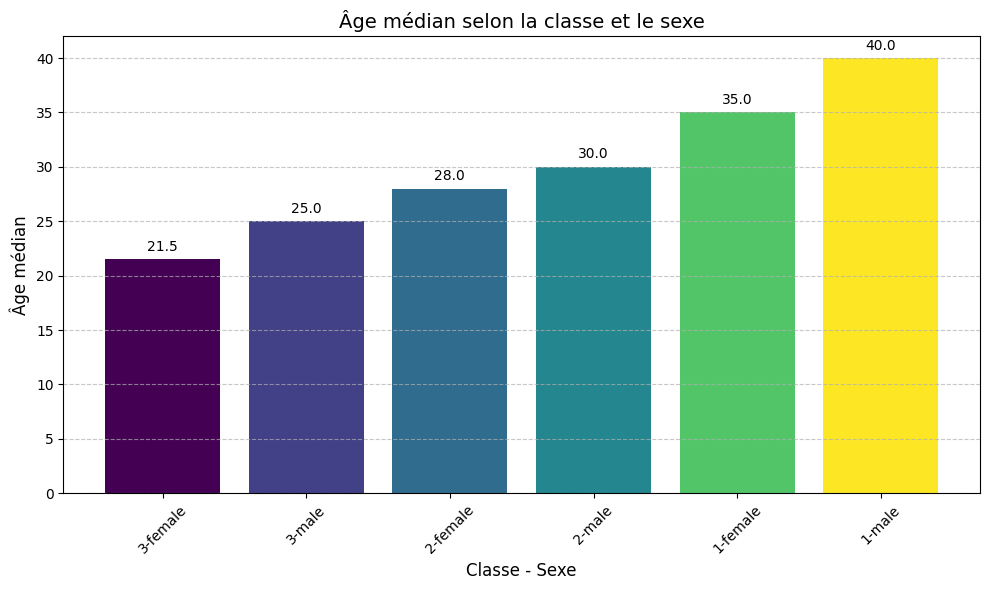

In [73]:
medianeAge = train_data.groupby(['Pclass', 'Sex'])['Age'].median()
print(f"Médiane selon la classe et le sexe : \n{medianeAge.to_string()} \n")

# Préparation pour l'affichage
medianeAge_sorted = medianeAge.sort_values()
labels = [f'{pclass}-{sex}' for pclass, sex in medianeAge_sorted.index]  
values = medianeAge_sorted.values

# Normalisation des couleurs selon l'âge
norm = colors.Normalize(vmin=min(values), vmax=max(values))
colormap = cm.viridis
bar_colors = colormap(norm(values))

# Tracé
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values, color=bar_colors)

# Ajout d’étiquettes au-dessus des barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Titres et axes
ax.set_title("Âge médian selon la classe et le sexe", fontsize=14)
ax.set_xlabel("Classe - Sexe", fontsize=12)
ax.set_ylabel("Âge médian", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Embarked,C,Q,S
Pclass,,,
1,40%,1%,59%
2,9%,2%,89%
3,13%,15%,72%


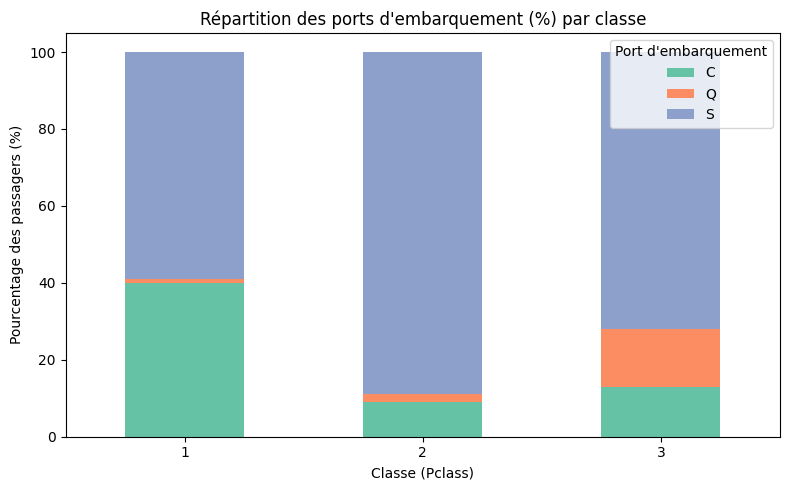

In [74]:
embarked_pct = train_data.groupby('Pclass')['Embarked'].value_counts(normalize=True).unstack().fillna(0) * 100
embarked_pct = embarked_pct.round()
embarked_pct_vis = embarked_pct.round().astype(int).astype(str) + '%'
display(embarked_pct_vis)

# Choix de la colormap
cmap = plt.cm.Set2
colors = [cmap(i) for i in range(len(embarked_pct.columns))]

# Tracé
embarked_pct.plot(kind='bar', stacked=True, color=colors, figsize=(8,5))

plt.title("Répartition des ports d'embarquement (%) par classe")
plt.xlabel("Classe (Pclass)")
plt.ylabel("Pourcentage des passagers (%)")
plt.legend(title="Port d'embarquement", loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

## 2. Analyse, Data Preparation & Feature Engineering des données avec Pandas
### Pré-traitement des données | pipeline de preprocessing

- **Valeurs manquantes**  
  - *Age* : complété par la médiane selon la classe et le sexe.  
  - *Embarked* : complété par la valeur la plus fréquente selon la classe.  
  - *Cabin* : à supprimer car peu pertinent.

- **Encodage des variables catégorielles**  
  - *Sex* : converti en numérique (0 = male, 1 = female).  
  - *Embarked* : transformé en variables indicatrices (one-hot encoding).  
  - *Name* : extraction du titre (Mr, Mrs, Miss, etc.) pour capter un signal social.
  
- **Suppression de variables**  
  - *Ticket* et *Name* (après extraction du titre) à supprimer car peu utiles.  
  - *Cabin* est souvent supprimé car peu de pertinence et beaucoup de valeurs manquantes ...

- **Création de variables dérivées**  
  - *FamilySize* = SibSp + Parch + 1 (taille totale de la famille à bord).  
  - *IsAlone* = 1 si FamilySize == 1, sinon 0.

In [75]:
def Age_completion(row):
    if pd.isnull(row['Age']):
        return medianeAge.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

# Appliquer la fonction à chaque ligne
train_data['Age'] = train_data.apply(Age_completion, axis=1)

print(f"Nombre de valeurs manquantes dans 'Age' maintenant : {train_data['Age'].isnull().sum()}")  

Nombre de valeurs manquantes dans 'Age' maintenant : 0


In [76]:
#La valeur S est la plus fréquente qu'importe la classe|sexe du passager
train_data['Embarked'] = train_data['Embarked'].fillna('S')

print(f"Nombre de valeurs manquantes dans 'Embarked' maintenant : {train_data['Embarked'].isnull().sum()}")  

Nombre de valeurs manquantes dans 'Embarked' maintenant : 0


In [77]:
#data_clean = train_data.drop(['Cabin','Ticket', 'Embarked', 'Fare', 'Name'], axis=1)
#data_clean.describe(include='all')